<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/ANN_with_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Getting to know the Data

1


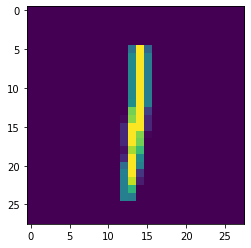

In [3]:
import random

random  = random.randint(0, 60001)
plt.imshow(X_train[random])
print(y_train[random])

In [4]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Preprocessing

In [6]:
# scaling 
X_train = X_train/255
X_test = X_test/255

In [7]:
# making the y variables categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test.copy(), 10)

In [8]:
y_train_cat.shape

(60000, 10)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = np.reshape(X_train, (60000, 784)) # Had to look at https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5 to see that we need to make the shapes 2D, not 3D
X_test = np.reshape(X_test, (10000, 784))

In [11]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Model

In [13]:
input = Input((784, ))

dense = Dense(128, activation = 'relu')

x = dense(input)
x = Dense(128, activation = 'relu') (x)
x = Dense(64, activation = 'relu') (x)
x = Dense(64, activation = 'relu') (x)
x = Dense(28, activation = 'relu') (x)

output = Dense(10,  activation = 'softmax') (x)

model = Model(inputs = input, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = 'accuracy')

In [14]:
# Callbacks 

# Early Stopping 
es_callback = EarlyStopping(monitor = 'accuracy', min_delta = 0.5, patience = 10)

# Learning Rate Scheduler 
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

ls_callback = LearningRateScheduler(scheduler)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 28)                1820      
                                                                 
 dense_5 (Dense)             (None, 10)                290   

In [16]:
model.fit(X_train, y_train_cat, validation_data = [X_test, y_test_cat], epochs = 100, callbacks = [es_callback, ls_callback])

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2716 - accuracy: 0.9182 - val_loss: 0.1342 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9655 - val_loss: 0.1032 - val_accuracy: 0.9693 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.1207 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0925 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0873 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0950 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 7/100
1875/1875 [=============================